# Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой).
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Описание данных
Вы будете работать с тремя датасетами:
- `ferma_main.csv`
- `ferma_dad.csv`
- `cow_buy.csv`

### Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

### Признаки в датасете `ferma_main.csv` можно разделить на группы:
- **Характеристики коровы**: id, Порода, порода папы_быка, Возраст.
- **Характеристики корма**: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- **Характеристика пастбища**: Тип пастбища.
- **Характеристики молока**: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

### Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

### Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей:
1. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
2. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
3. Отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Инструкция по выполнению проекта

### Шаг 1. Загрузите и изучите данные
Загрузите данные в датафреймы pandas. Файлы можно скачать по ссылкам в описании, они доступны через пути:
- `/datasets/ferma_main.csv`
- `/datasets/ferma_dad.csv`
- `/datasets/cow_buy.csv`

Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

### Шаг 2. Предобработка данных
Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

### Шаг 3. Исследовательский анализ данных
Проведите статистический анализ всех признаков.
Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
Сделайте выводы о данных:
- Напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности.
- Расскажите, как вы планируете улучшить данные.

### Шаг 4. Проведите корреляционный анализ признаков в датасете `ferma_main.csv`
Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
Постройте диаграммы рассеяния (scatterplot) для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
Сделайте выводы о взаимосвязи признаков.
- Какой тип взаимосвязи между целевым и входными признаками?
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
- Наблюдается ли мультиколлинеарность между входными признаками?

### Шаг 5. Задача регрессии
Вам предстоит обучить три модели простой линейной регрессии.

1. Подготовьте данные датасета `ferma_main.csv` и обучите на них первую модель `LinearRegression`.
   - Используйте в качестве целевого признака Удой, кг.
   - Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
   - Разбейте данные на тренировочную и тестовую выборки.
   - Кодируйте категориальные признаки с помощью `OneHotEncoder`.
   - Масштабируйте количественные признаки с помощью `StandardScaler`.
   - Обучите модель линейной регрессии на подготовленных данных.
   - Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
   - Оформите выводы, укажите:
     - Значение R² модели;
     - Какие выводы следуют из анализа остатков;
     - Нужны ли дополнительные исследования.

2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель `LinearRegression`.
   - Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
     - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
     - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
   - Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

3. Добавьте в данные новый признак и обучите на них третью модель `LinearRegression`.
   - Добавьте признак Имя Папы из файла `ferma_dad.csv`, соединив его с остальными данными `ferma_main.csv` по ключу.
   - Устраните нелинейность между признаками.
   - Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
   - Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
   - Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
     - Выберите лучшую модель;
     - Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.
   - С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете `cow_buy.csv`.
     - Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета `ferma_main.csv` средние значения каждого из признаков и увеличьте их на 5%.
     - Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
     - Получите прогноз удоя коров.

### Шаг 6. Задача классификации
Подготовьте данные датасета `ferma_main.csv` и обучите на них модель `LogisticRegression`.
- Используйте в качестве целевого признака Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью `OneHotEncoder`.
- Масштабируйте количественные признаки с помощью `StandardScaler`.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.
- Проанализируйте модель логистической регрессии.
  - Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
  - Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
- Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?
- С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете `cow_buy.csv`.
  - Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
  - Получите прогноз вкуса молока коров.

### Шаг 7. Сделайте итоговые выводы
- Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы моделей для фермера.
  - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
  - Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии.
  - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
  - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
  - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?


### Шаг 1. Загрузка и изучение данных

In [1]:
!pip install --upgrade -q scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error,
                             mean_absolute_error, root_mean_squared_error, accuracy_score, recall_score, precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
RANDOM_STATE = 42

In [3]:
try:
    farm_main = pd.read_csv('datasets/ferma_main.csv', sep=';')
    farm_dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    farm_main = pd.read_csv('/datasets/ferma_main.csv',sep=';')
    farm_dad = pd.read_csv('/datasets/ferma_dad.csv',sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep=';')

In [4]:
farm_main.columns = farm_main.columns.str.strip().str.lower()
farm_dad.columns = farm_dad.columns.str.strip().str.lower()
cow_buy.columns = cow_buy.columns.str.strip().str.lower()

In [5]:
display(farm_main.info())
display(farm_main.head())

display(farm_dad.info())
display(farm_dad.head())

display(cow_buy.info())
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   удой, кг                               634 non-null    int64 
 2   эке (энергетическая кормовая единица)  634 non-null    object
 3   сырой протеин, г                       634 non-null    int64 
 4   спо (сахаро-протеиновое соотношение)   634 non-null    object
 5   порода                                 634 non-null    object
 6   тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   жирность,%                             634 non-null    object
 9   белок,%                                634 non-null    object
 10  вкус молока                            634 non-null    object
 11  возраст            

None

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность,%       20 non-null     object
 5   текущий_уровень_белок,%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Данные загружены, все столбцы были приведены к нижнему регистру

### Шаг 2. Предобработка данных

Переименуем столбцы и изменим типы данных

In [6]:
farm_main = farm_main.rename({
    'эке (энергетическая кормовая единица)': 'эке',
    'спо (сахаро-протеиновое соотношение)': 'спо',
    'порода папы_быка': 'порода папы быка',
}, axis=1)

cow_buy = cow_buy.rename({
    'порода папы_быка': 'порода папы быка',
    'имя_папы': 'имя папы',
}, axis=1)

farm_main['эке'] = farm_main['эке'].str.replace(',', '.').astype('float')
farm_main['спо'] = farm_main['спо'].str.replace(',', '.').astype('float')
farm_main['жирность,%'] = farm_main['жирность,%'].str.replace(',', '.').astype('float')
farm_main['белок,%'] = farm_main['белок,%'].str.replace(',', '.').astype('float')

cow_buy['текущая_жирность,%'] = cow_buy['текущая_жирность,%'].str.replace(',', '.').astype('float')
cow_buy['текущий_уровень_белок,%'] = cow_buy['текущий_уровень_белок,%'].str.replace(',', '.').astype('float')

Переименовали столбцы, изменили типы данных

Мы не можем удалять строки из таблицы с коровами для предсказаний, так как это тестовая выборка и все строки важны для предсказаний

In [72]:
print('Количество явных дубликатов:')
print(f'Данные о стаде фермера: {farm_main.duplicated().sum()}')
print(f'Имена пап коров: {farm_dad.duplicated().sum()}')
print(f'Коровы ЭкоФермы: {cow_buy.duplicated().sum()}')

Количество явных дубликатов:
Данные о стаде фермера: 5
Имена пап коров: 0
Коровы ЭкоФермы: 4


In [8]:
print('Неявные дубликаты до:')
print(farm_main.nunique())
print(farm_main['порода'].unique())
print(farm_main['тип пастбища'].unique())
print(farm_main['порода папы быка'].unique())
print(farm_main['вкус молока'].unique())
print(farm_main['возраст'].unique())

farm_main.loc[farm_main['тип пастбища'] == 'Равнинные', 'тип пастбища'] = 'Равнинное'
farm_main.loc[farm_main['порода папы быка'] == 'Айдиалл', 'порода папы быка'] = 'Айдиал'

print('После исправления:')
print(farm_main['тип пастбища'].unique())
print(farm_main['порода папы быка'].unique())

print()

print('Неявные дубликаты до:')
print(cow_buy.nunique())
print(cow_buy['порода'].unique())
print(cow_buy['тип пастбища'].unique())
print(cow_buy['порода папы быка'].unique())
print(cow_buy['имя папы'].unique())

Неявные дубликаты до:
id                  629
удой, кг            528
эке                  55
сырой протеин, г    401
спо                  12
порода                2
тип пастбища          3
порода папы быка      3
жирность,%           50
белок,%              15
вкус молока           2
возраст               2
dtype: int64
['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']
После исправления:
['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']

Неявные дубликаты до:
порода                      2
тип пастбища                2
порода папы быка            2
имя папы                    4
текущая_жирность,%         12
текущий_уровень_белок,%    12
возраст                     2
dtype: int64
['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


Удалили явные дубликаты, исправили неявные

In [9]:
print('Пропуски:')
print(farm_main.isna().sum())
print()
print(farm_dad.isna().sum())
print()
print(cow_buy.isna().sum())

Пропуски:
id                  0
удой, кг            0
эке                 0
сырой протеин, г    0
спо                 0
порода              0
тип пастбища        0
порода папы быка    0
жирность,%          0
белок,%             0
вкус молока         0
возраст             0
dtype: int64

id          0
имя папы    0
dtype: int64

порода                     0
тип пастбища               0
порода папы быка           0
имя папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64


Пропусков нет

### Шаг 3. Исследовательский анализ данных

In [10]:
farm_main.describe()

,id,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Есть выбросы в столбце "удой, кг". 45616 кг при медианном значении 6000 кг. Посмотрим на гистограмму. В остальных столбцах выбросов нет

(634, 12)
(633, 12)


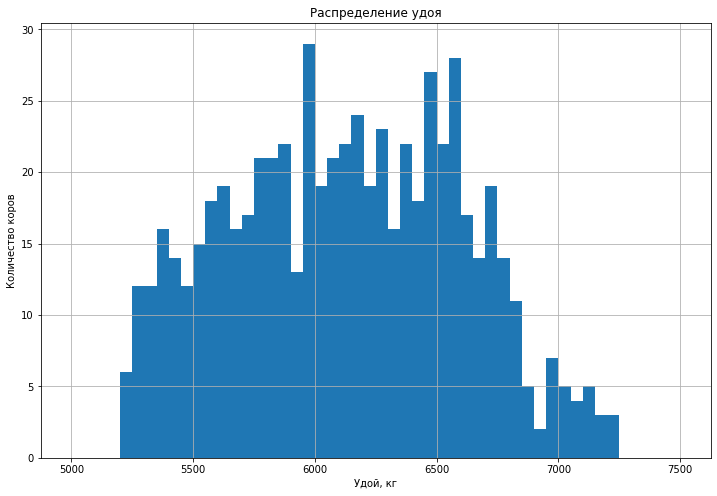

In [11]:
plt.figure(figsize=(12, 8))
plt.title('Распределение удоя')
plt.xlabel('Удой, кг')
plt.ylabel('Количество коров')
farm_main['удой, кг'].hist(bins=50, range=(5000, 7500))

# Количество данных до удаления выбросов
print(farm_main.shape)

# Удалим выбросы
# Выбросами считаются данные, которые отличаются на 3 стандартных отклонения от среднего
farm_main = farm_main[np.abs(farm_main['удой, кг'] - farm_main['удой, кг'].mean()) <= (3 * farm_main['удой, кг'].std())]

# Количество данных после удаления выбросов
print(farm_main.shape)

Удалили выбросы для удоя. В сумме была удалена всего одна строка

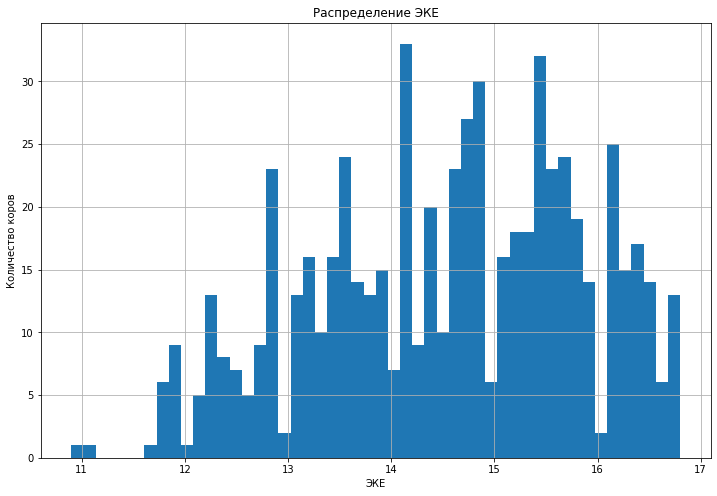

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Распределение ЭКЕ')
plt.xlabel('ЭКЕ')
plt.ylabel('Количество коров')
farm_main['эке'].hist(bins=50)
plt.show()

Распределение ЭКЕ находится в диапазоне от 11 до 17

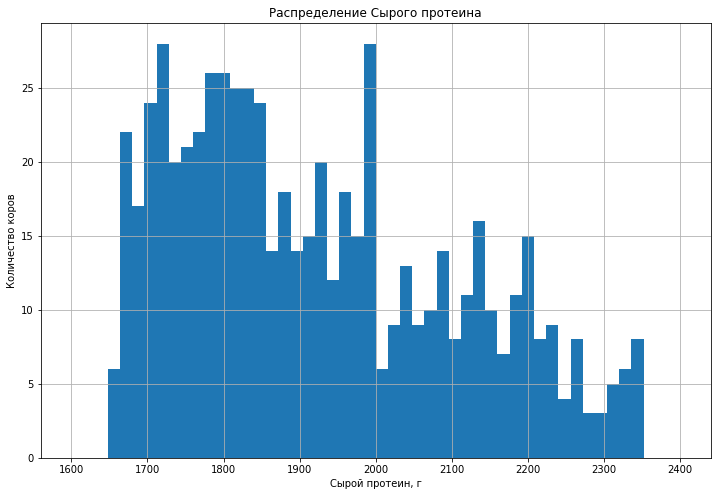

In [13]:
plt.figure(figsize=(12, 8))
plt.title('Распределение Сырого протеина')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Количество коров')
farm_main['сырой протеин, г'].hist(bins=50, range=(1600, 2400))
plt.show()

Сырой протеин находится в диапазоне от 1600 до 2400. Пик приходится на 1700 и 2000 г

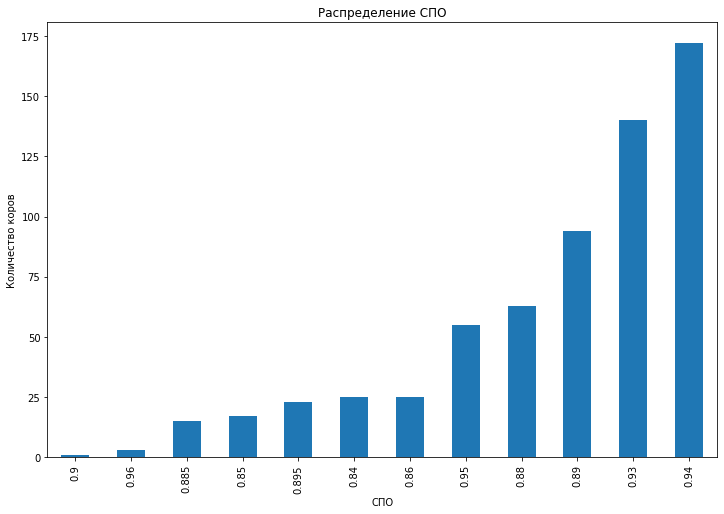

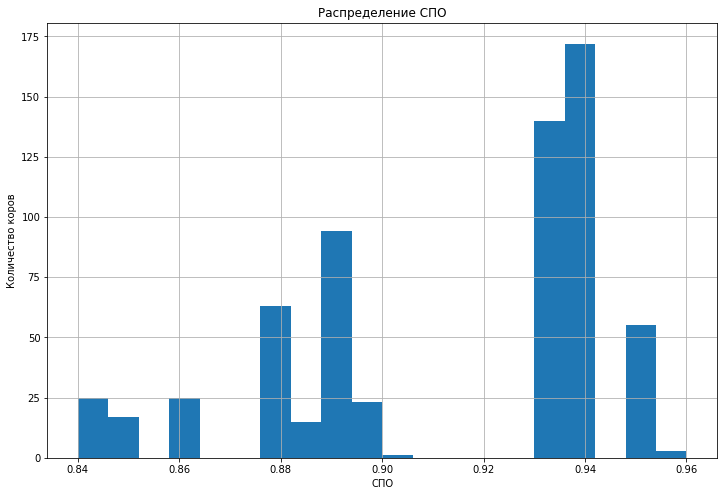

In [14]:
# plt.figure(figsize=(12, 8))
# plt.title('Распределение СПО')
# plt.xlabel('СПО')
# plt.ylabel('Количество коров')
# plt.pie(farm_main['спо'].value_counts(), labels=farm_main['спо'].unique(), autopct='%1.1f%%')
# plt.show()

# Столбчатая диаграмма
plt.figure(figsize=(12, 8))
plt.title('Распределение СПО')
plt.xlabel('СПО')
plt.ylabel('Количество коров')
farm_main['спо'].value_counts().sort_values().plot(kind='bar')
plt.show()

# Гистограмма для СПО
plt.figure(figsize=(12, 8))
plt.title('Распределение СПО')
plt.xlabel('СПО')
plt.ylabel('Количество коров')
farm_main['спо'].hist(bins=20)
plt.show()

На гистограмме видно, что СПО может быть преобразовано в категориальный бинарный признак

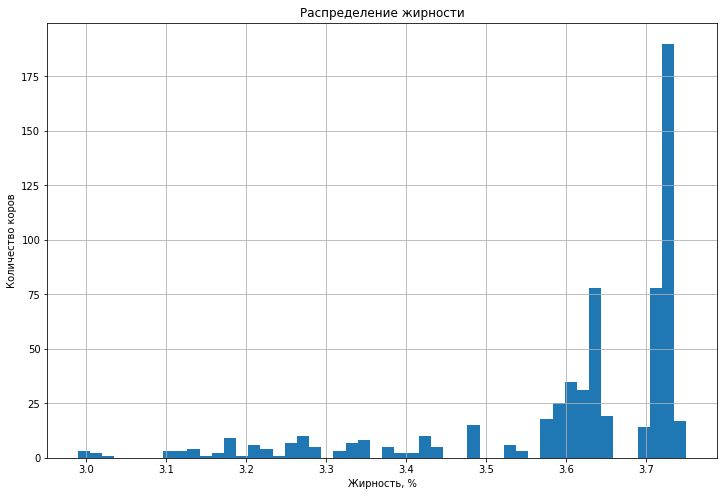

In [15]:
plt.figure(figsize=(12, 8))
plt.title('Распределение жирности')
plt.xlabel('Жирность, %')
plt.ylabel('Количество коров')
farm_main['жирность,%'].hist(bins=50)
plt.show()

На гистограмме видно, что жирность также можно преобразовать в категориальный бинарный признак

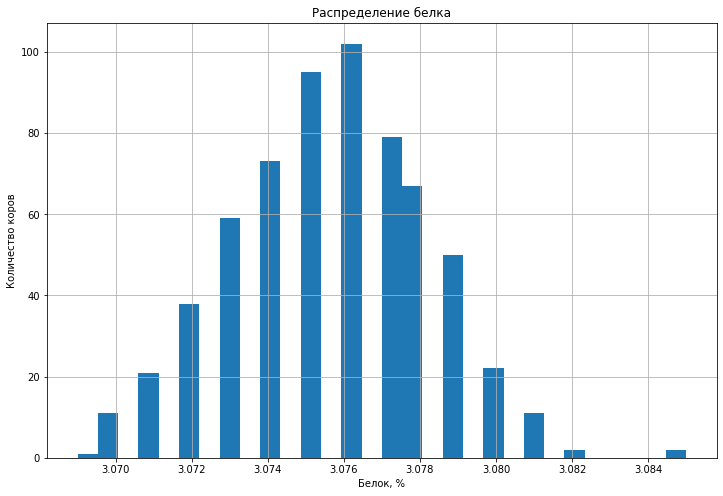

In [16]:
plt.figure(figsize=(12, 8))
plt.title('Распределение белка')
plt.xlabel('Белок, %')
plt.ylabel('Количество коров')
farm_main['белок,%'].hist(bins=30)
plt.show()

Распределение белка похоже на нормальное. Оставим всё как есть

#### Вывод
В удое был обнаружен выброс, который был удален. В остальных столбцах выбросов не было. СПО и жирность можно преобразовать в категориальные бинарные признаки

### Шаг 4. Корреляционный анализ

In [17]:
train_data, test_data = train_test_split(farm_main, random_state=RANDOM_STATE)

In [18]:
categorical_columns = ['тип пастбища', 'порода', 'порода папы быка', 'вкус молока', 'возраст']
quantitative_columns = ['удой, кг', 'эке', 'сырой протеин, г', 'спо', 'жирность,%', 'белок,%']

In [19]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoder.fit(train_data[categorical_columns])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [20]:
train_encoded_columns = pd.DataFrame(encoder.transform(train_data[categorical_columns]),
                                        columns=encoder.get_feature_names_out(categorical_columns),
                                        index=train_data.index)
test_encoded_columns = pd.DataFrame(encoder.transform(test_data[categorical_columns]),
                                        columns=encoder.get_feature_names_out(categorical_columns),
                                        index=test_data.index)
selected_columns = quantitative_columns + list(train_encoded_columns.columns)

In [21]:
train_data_encoded = pd.concat([train_data, train_encoded_columns], axis=1)
test_data_encoded = pd.concat([test_data, test_encoded_columns], axis=1)

In [22]:
corr_matrix = train_data_encoded[selected_columns].corr(method='spearman')
corr_matrix

,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%",тип пастбища_Холмистое,порода_РефлешнСоверинг,порода папы быка_Соверин,вкус молока_не вкусно,возраст_менее_2_лет
"удой, кг",1.000000,0.766206,0.407517,0.794383,0.720916,0.021134,0.098840,0.047890,-0.440595,-0.097008,-0.674593
эке,0.766206,1.000000,0.350387,0.753005,0.704925,0.017855,0.095125,0.066112,-0.129474,-0.230841,-0.539329
"сырой протеин, г",0.407517,0.350387,1.000000,0.480060,0.373063,0.246947,0.044361,-0.011741,-0.018986,-0.136713,-0.278658
спо,0.794383,0.753005,0.480060,1.000000,0.722086,0.125471,0.002420,0.034051,-0.212962,-0.267866,-0.514074
"жирность,%",0.720916,0.704925,0.373063,0.722086,1.000000,0.045949,-0.046789,0.057769,-0.072919,-0.161239,-0.487586
"белок,%",0.021134,0.017855,0.246947,0.125471,0.045949,1.000000,0.117884,-0.273853,-0.049514,-0.132109,-0.004932
тип пастбища_Холмистое,0.098840,0.095125,0.044361,0.002420,-0.046789,0.117884,1.000000,0.150995,0.009533,-0.125333,-0.077692
порода_РефлешнСоверинг,0.047890,0.066112,-0.011741,0.034051,0.057769,-0.273853,0.150995,1.000000,0.086760,0.036762,-0.042545
порода папы быка_Соверин,-0.440595,-0.129474,-0.018986,-0.212962,-0.072919,-0.049514,0.009533,0.086760,1.000000,0.038458,0.285043
вкус молока_не вкусно,-0.097008,-0.230841,-0.136713,-0.267866,-0.161239,-0.132109,-0.125333,0.036762,0.038458,1.000000,0.107597


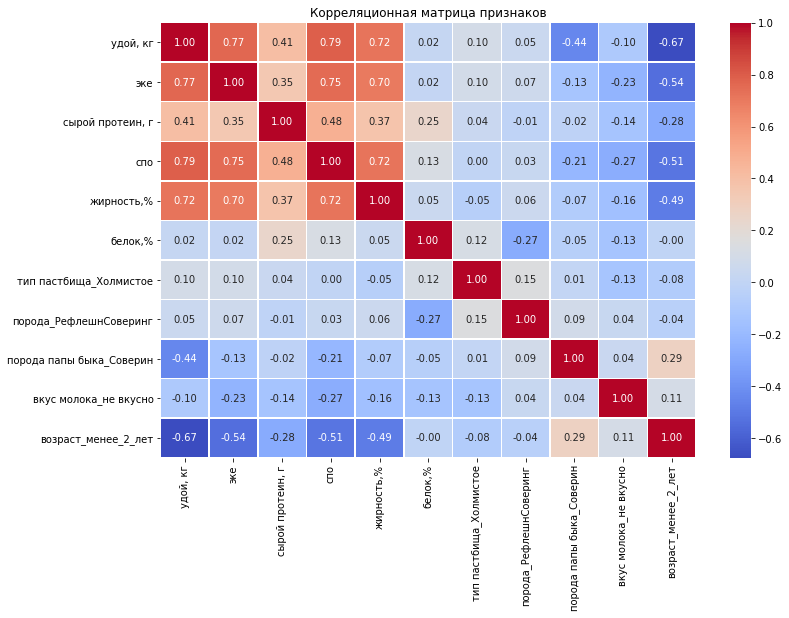

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

#### Вывод
Есть умеренно-сильная корреляция между удоем и ЭКЕ, СПО и жирностью. Это говорит о том, что при большем удое у коровы уровень этих показателей выше. Также есть слабая корреляция между удоем и сырым протеином. Остальные признаки практически не коррелируют между собой и удоем

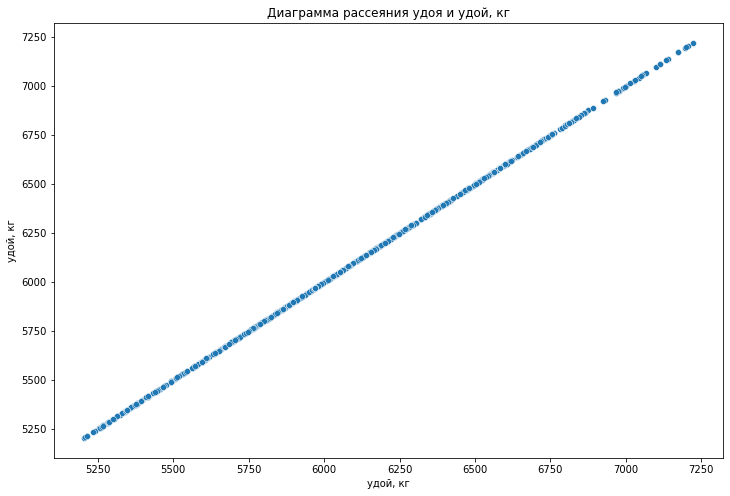

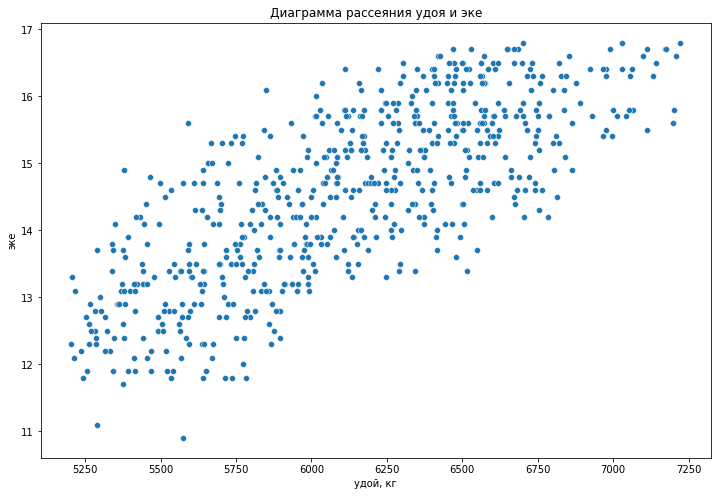

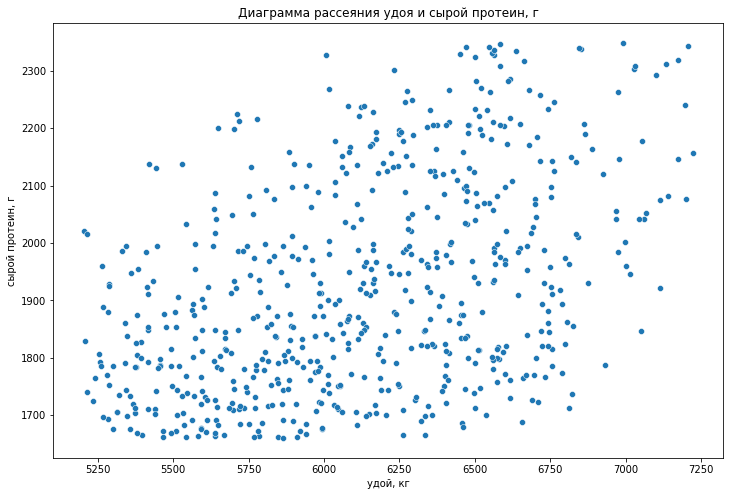

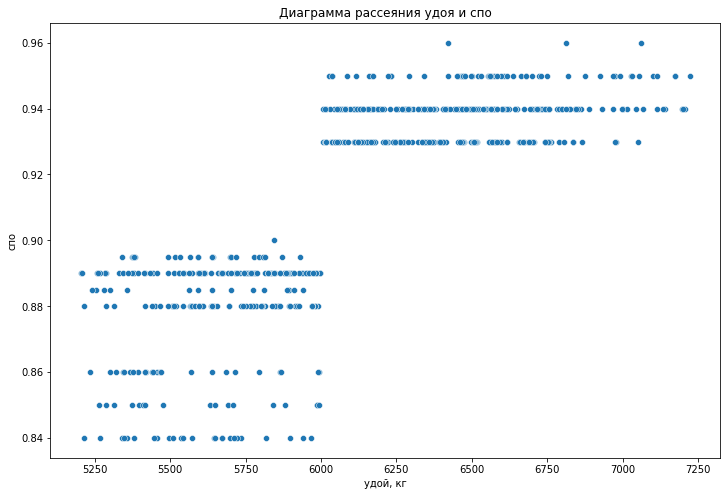

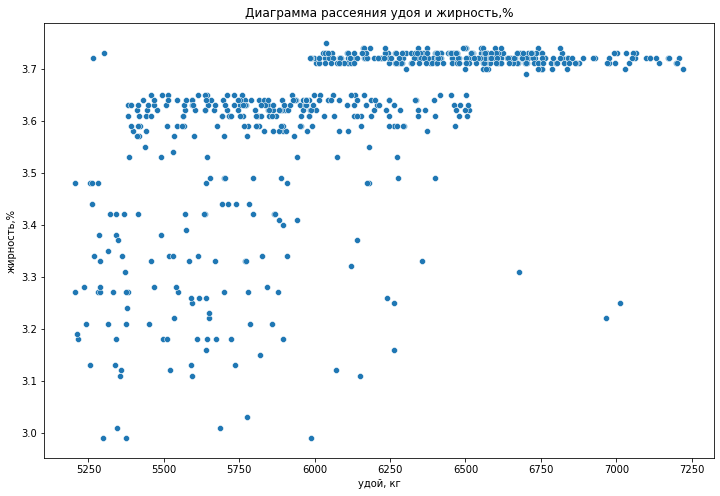

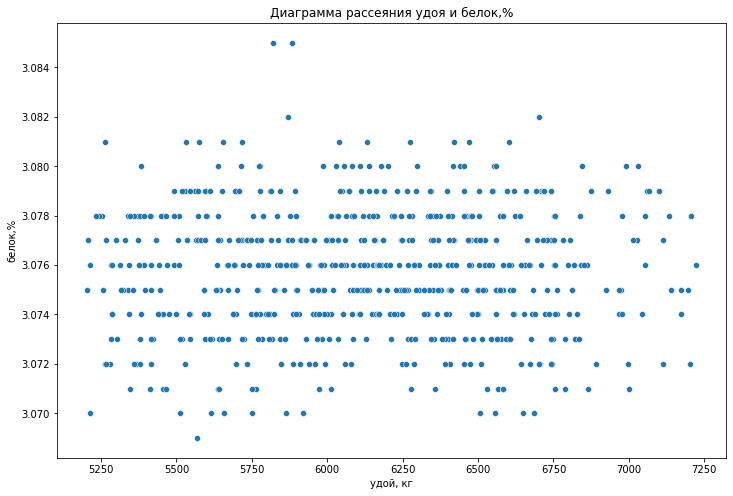

In [24]:
for column in quantitative_columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=farm_main, x='удой, кг', y=column)
    plt.title(f'Диаграмма рассеяния удоя и {column}')
    plt.show()

#### Вывод
СПО и жирность напрямую влияют на удой. Чем выше СПО и жирность, тем выше удой. Остальные признаки распределены равномерно

СПО и жирность - нелинейные признаки
Мультиколлинеарность наблюдается между ЭКЕ и жирностью

### Шаг 5. Задача регрессии

In [25]:
scaler = StandardScaler()

In [26]:
good_corr_columns = ['спо', 'эке', 'сырой протеин, г']

In [27]:
X_1 = test_data_encoded[good_corr_columns]
y_1 = test_data_encoded['удой, кг']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=RANDOM_STATE)

print('Размер обучающей выборки:', X_train_1.shape[0])
print('Размер тестовой выборки:', X_test_1.shape[0])

X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

Размер обучающей выборки: 119
Размер тестовой выборки: 40


Обучение модели линейной регрессии 1

In [28]:
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train_scaled_1, y_train_1)
predictions_1 = lr_model_1.predict(X_test_scaled_1)

print('R²:', r2_score(y_test_1, predictions_1))

R²: 0.7373065685338944


Анализ остатков

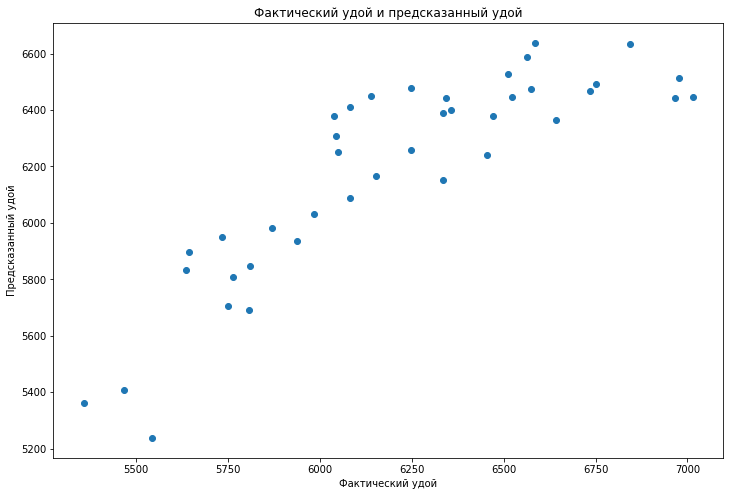

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test_1, predictions_1)
plt.xlabel('Фактический удой')
plt.ylabel('Предсказанный удой')
plt.title('Фактический удой и предсказанный удой')
plt.show()

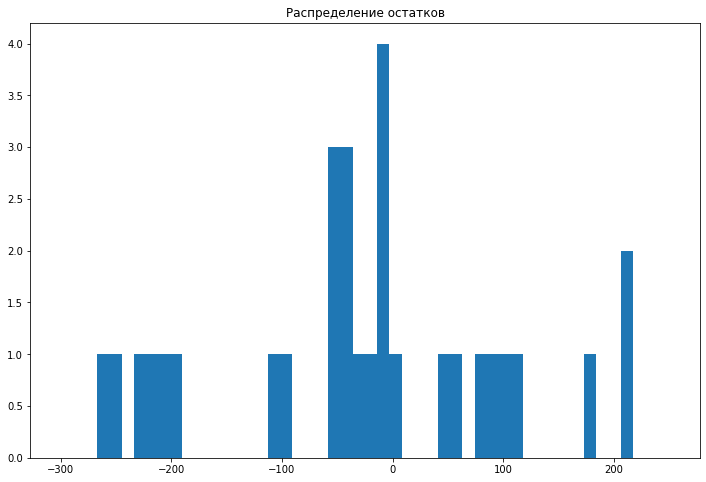

In [30]:
residuals = y_test_1 - predictions_1

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, range=(-300, 250))
plt.title('Распределение остатков')
plt.show()

#### Вывод
Остатки распределены не равномерно. R² = 0.74, что говорит о хорошем качестве модели, но можно попробовать улучшить её ещё

Обучение модели линейной регрессии 2

Удой и СПО имеют нелинейную зависимость. Преобразуем СПО в категориальный бинарный признак

In [31]:
# Возьмём границу СПО из диаграммы рассеяния
cut_off_spo = 0.9
farm_main['спо'] = farm_main['спо'].apply(lambda x: 1 if x > cut_off_spo else 0)

Теперь СПО бинарный признак. Если СПО > 0.9, то 1, иначе 0

Удой и ЭКЕ также имеют нелинейную зависимость. Добавим новый признак ЭКЕ в квадрате

In [32]:
train_data_encoded['эке_квадрат'] = train_data_encoded['эке'] ** 2

Создадим новую модель с учётом новых признаков

In [33]:
good_corr_columns = ['спо', 'эке_квадрат', 'сырой протеин, г']

In [34]:
X_2 = train_data_encoded[good_corr_columns]
y_2 = train_data_encoded['удой, кг']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=RANDOM_STATE)

X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [35]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_scaled_2, y_train_2)

predictions_2 = lr_model_2.predict(X_test_scaled_2)

print('R²:', r2_score(y_test_2, predictions_2))

R²: 0.6787312838164046


Анализ остатков

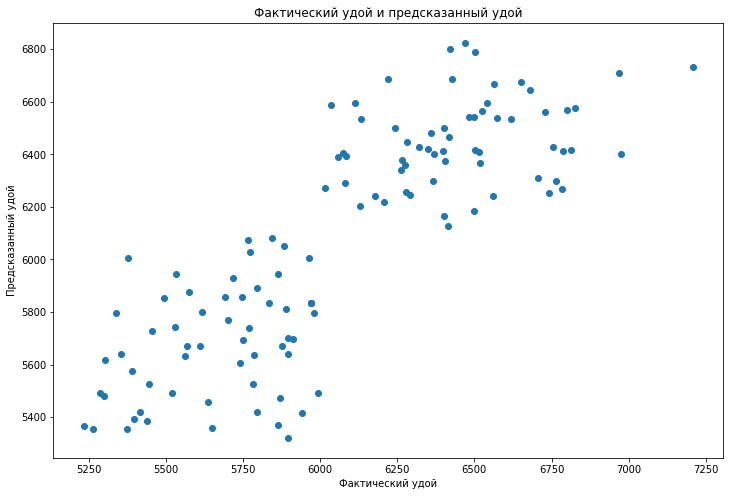

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test_2, predictions_2)
plt.xlabel('Фактический удой')
plt.ylabel('Предсказанный удой')
plt.title('Фактический удой и предсказанный удой')
plt.show()

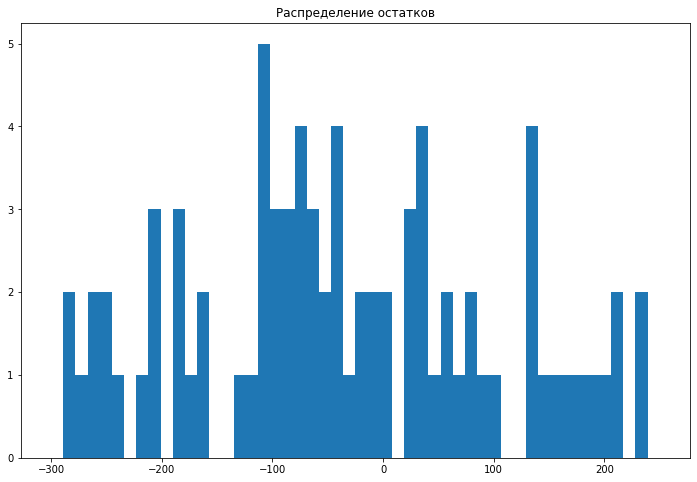

In [37]:
residuals = y_test_2 - predictions_2

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, range=(-300, 250))
plt.title('Распределение остатков')
plt.show()

R² уменьшился до 0.68. Модель стала хуже

Обучение модели линейной регрессии 3

Добавим признак имя папы

In [38]:
print('Размер датафрейма до слияния:', train_data_encoded.shape)

train_data_encoded = train_data_encoded.merge(farm_dad, on='id', how='left')
train_data_encoded['имя папы'] = train_data_encoded['имя папы'].fillna('Неизвестно')

# Закодируем признак имя папы
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoder.fit(train_data_encoded[['имя папы']])
encoded_columns = pd.DataFrame(encoder.transform(train_data_encoded[['имя папы']]),
                                columns=encoder.get_feature_names_out(['имя папы']))


train_data_encoded = pd.concat([train_data_encoded, encoded_columns], axis=1)
train_data_encoded.drop('имя папы', axis=1, inplace=True)

print('Размер датафрейма после слияния и кодирования:', train_data_encoded.shape)

train_data_encoded

Размер датафрейма до слияния: (474, 18)
Размер датафрейма после слияния и кодирования: (474, 21)


,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",...,возраст,тип пастбища_Холмистое,порода_РефлешнСоверинг,порода папы быка_Соверин,вкус молока_не вкусно,возраст_менее_2_лет,эке_квадрат,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик
0,609,6405,15.6,1787,0.930,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.077,...,более_2_лет,1.0,0.0,1.0,1.0,0.0,243.36,0.0,0.0,1.0
1,323,5215,13.1,1741,0.840,РефлешнСоверинг,Равнинное,Соверин,3.18,3.070,...,менее_2_лет,0.0,1.0,1.0,1.0,1.0,171.61,0.0,0.0,0.0
2,201,5443,13.2,2130,0.860,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.076,...,менее_2_лет,0.0,0.0,1.0,1.0,1.0,174.24,0.0,0.0,1.0
3,410,5950,14.2,2136,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.59,3.075,...,более_2_лет,0.0,0.0,1.0,1.0,0.0,201.64,0.0,0.0,0.0
4,426,5717,12.7,1710,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.073,...,более_2_лет,0.0,0.0,0.0,0.0,0.0,161.29,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,73,5718,13.7,2212,0.895,РефлешнСоверинг,Холмистое,Айдиал,3.61,3.077,...,более_2_лет,1.0,1.0,0.0,0.0,0.0,187.69,0.0,0.0,0.0
470,108,6392,14.9,1742,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.72,3.073,...,более_2_лет,0.0,0.0,0.0,0.0,0.0,222.01,0.0,1.0,0.0
471,272,5971,13.4,1775,0.880,РефлешнСоверинг,Равнинное,Айдиал,3.63,3.071,...,более_2_лет,0.0,1.0,0.0,0.0,0.0,179.56,0.0,1.0,0.0
472,437,5858,13.1,1949,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.075,...,более_2_лет,0.0,0.0,0.0,1.0,0.0,171.61,1.0,0.0,0.0


Устраним нелинейность между признаками

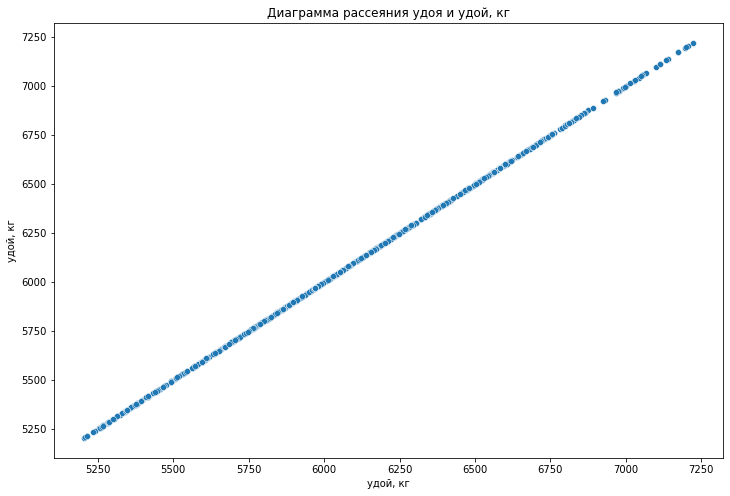

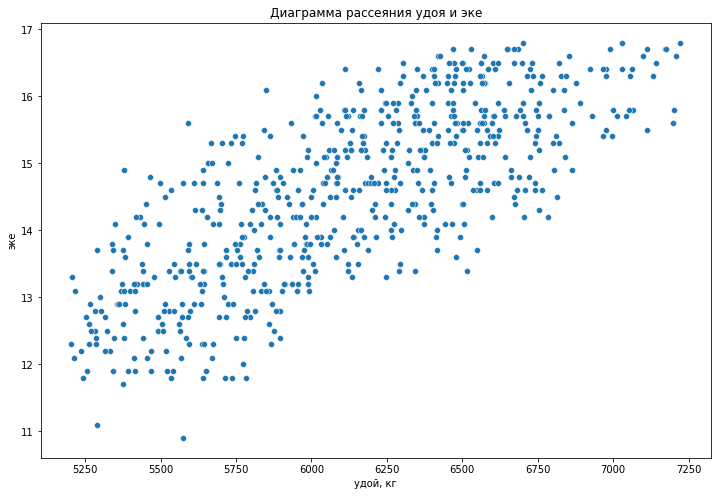

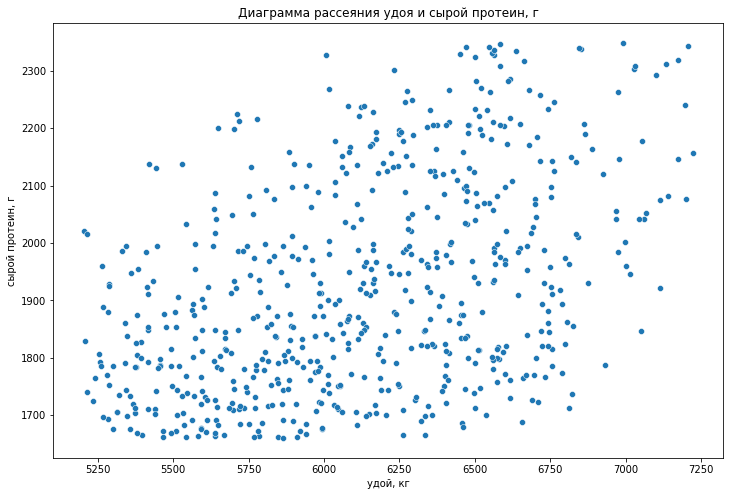

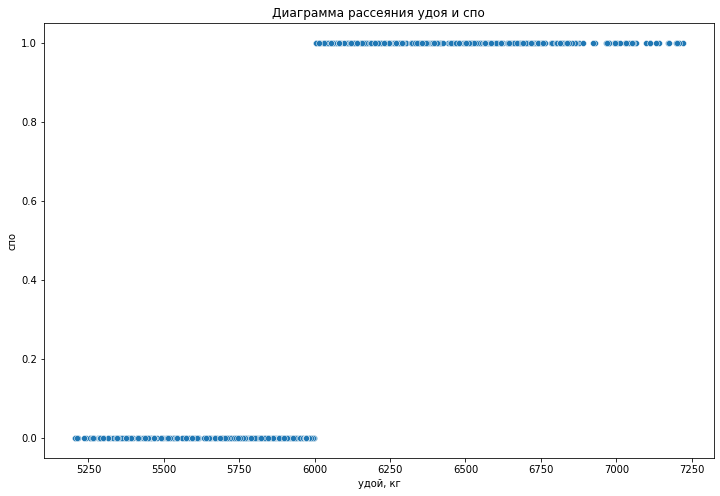

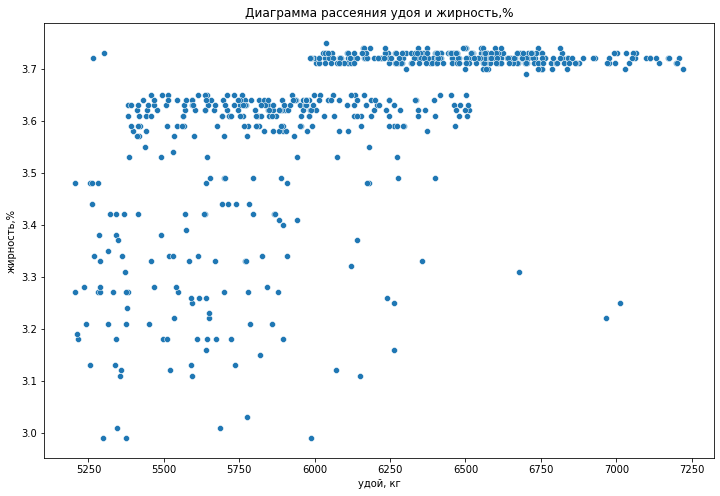

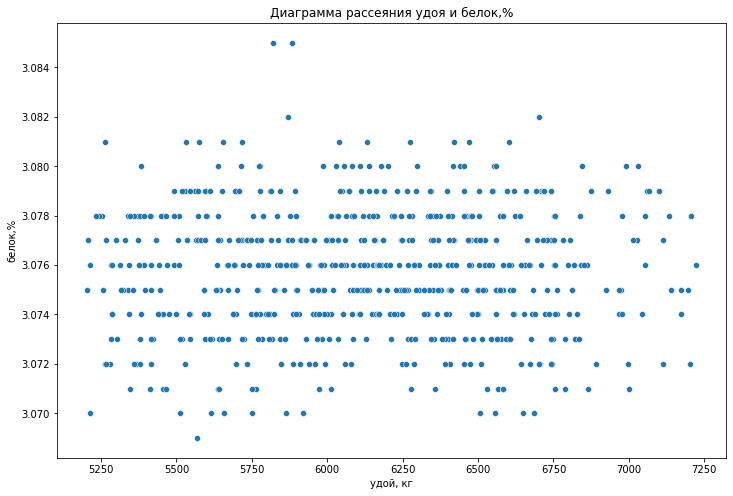

In [39]:
for column in quantitative_columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=farm_main, x='удой, кг', y=column)
    plt.title(f'Диаграмма рассеяния удоя и {column}')
    plt.show()

In [40]:
# Удалим нелинейность между удоем и жирностью

cut_off_fat = 3.68
train_data_encoded['жирность,%'] = train_data_encoded['жирность,%'].apply(lambda x: 1 if x > cut_off_fat else 0)

# Сделаем породу бинарным признаком
train_data_encoded['порода'] = train_data_encoded['порода'].apply(lambda x: 1 if x == 'РефлешнСоверинг' else 0)

# Сделаем тип пастбища бинарным признаком
train_data_encoded['тип пастбища'] = train_data_encoded['тип пастбища'].apply(lambda x: 1 if x == 'Равнинное' else 0)

# Сделаем породу папы бинарным признаком
train_data_encoded['порода папы быка'] = train_data_encoded['порода папы быка'].apply(lambda x: 1 if x == 'Айдиал' else 0)

# Сделаем вкус молока бинарным признаком
train_data_encoded['вкус молока'] = train_data_encoded['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

# Сделаем возраст бинарным признаком
train_data_encoded['возраст'] = train_data_encoded['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)

train_data_encoded

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",...,возраст,тип пастбища_Холмистое,порода_РефлешнСоверинг,порода папы быка_Соверин,вкус молока_не вкусно,возраст_менее_2_лет,эке_квадрат,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик
0,609,6405,15.6,1787,0.930,0,0,0,1,3.077,...,1,1.0,0.0,1.0,1.0,0.0,243.36,0.0,0.0,1.0
1,323,5215,13.1,1741,0.840,1,1,0,0,3.070,...,0,0.0,1.0,1.0,1.0,1.0,171.61,0.0,0.0,0.0
2,201,5443,13.2,2130,0.860,0,1,0,0,3.076,...,0,0.0,0.0,1.0,1.0,1.0,174.24,0.0,0.0,1.0
3,410,5950,14.2,2136,0.890,0,1,0,0,3.075,...,1,0.0,0.0,1.0,1.0,0.0,201.64,0.0,0.0,0.0
4,426,5717,12.7,1710,0.890,0,1,1,0,3.073,...,1,0.0,0.0,0.0,0.0,0.0,161.29,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,73,5718,13.7,2212,0.895,1,0,1,0,3.077,...,1,1.0,1.0,0.0,0.0,0.0,187.69,0.0,0.0,0.0
470,108,6392,14.9,1742,0.930,0,1,1,1,3.073,...,1,0.0,0.0,0.0,0.0,0.0,222.01,0.0,1.0,0.0
471,272,5971,13.4,1775,0.880,1,1,1,0,3.071,...,1,0.0,1.0,0.0,0.0,0.0,179.56,0.0,1.0,0.0
472,437,5858,13.1,1949,0.880,0,1,1,0,3.075,...,1,0.0,0.0,0.0,1.0,0.0,171.61,1.0,0.0,0.0


Построим новую матрицу корреляций

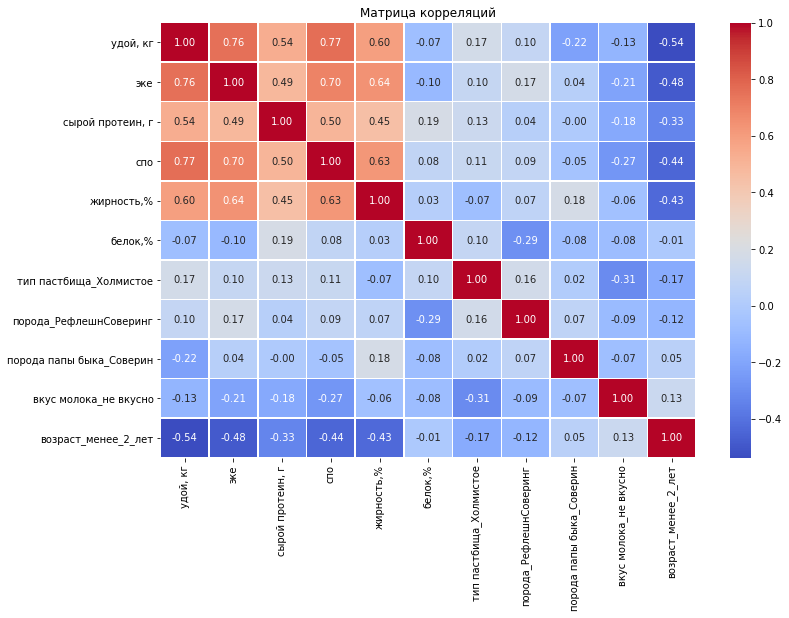

In [41]:
numeric_columns = test_data_encoded.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.drop(['id'], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(method='spearman'), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Хорошая корреляция наблюдается у: удоя и спо, удоя и породы папы быка, удоя и жирности, удоя и возраста, удоя и эке в квадрате и удоя и имени папы

In [42]:
train_data_encoded

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",...,возраст,тип пастбища_Холмистое,порода_РефлешнСоверинг,порода папы быка_Соверин,вкус молока_не вкусно,возраст_менее_2_лет,эке_квадрат,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик
0,609,6405,15.6,1787,0.930,0,0,0,1,3.077,...,1,1.0,0.0,1.0,1.0,0.0,243.36,0.0,0.0,1.0
1,323,5215,13.1,1741,0.840,1,1,0,0,3.070,...,0,0.0,1.0,1.0,1.0,1.0,171.61,0.0,0.0,0.0
2,201,5443,13.2,2130,0.860,0,1,0,0,3.076,...,0,0.0,0.0,1.0,1.0,1.0,174.24,0.0,0.0,1.0
3,410,5950,14.2,2136,0.890,0,1,0,0,3.075,...,1,0.0,0.0,1.0,1.0,0.0,201.64,0.0,0.0,0.0
4,426,5717,12.7,1710,0.890,0,1,1,0,3.073,...,1,0.0,0.0,0.0,0.0,0.0,161.29,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,73,5718,13.7,2212,0.895,1,0,1,0,3.077,...,1,1.0,1.0,0.0,0.0,0.0,187.69,0.0,0.0,0.0
470,108,6392,14.9,1742,0.930,0,1,1,1,3.073,...,1,0.0,0.0,0.0,0.0,0.0,222.01,0.0,1.0,0.0
471,272,5971,13.4,1775,0.880,1,1,1,0,3.071,...,1,0.0,1.0,0.0,0.0,0.0,179.56,0.0,1.0,0.0
472,437,5858,13.1,1949,0.880,0,1,1,0,3.075,...,1,0.0,0.0,0.0,1.0,0.0,171.61,1.0,0.0,0.0


In [43]:
good_corr_columns = ['спо', 'порода', 'сырой протеин, г','тип пастбища', 'порода папы быка', 'возраст', 'эке_квадрат']
selected_columns = good_corr_columns + list(encoded_columns.columns)

In [44]:
X_3 = train_data_encoded[selected_columns]
y_3 = train_data_encoded['удой, кг']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=RANDOM_STATE)

X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

In [45]:
lr_model_3 = LinearRegression()
lr_model_3.fit(X_train_scaled_3, y_train_3)

predictions_3 = lr_model_3.predict(X_test_scaled_3)

print('R²:', r2_score(y_test_3, predictions_3))

R²: 0.8358829531047323


Анализ остатков

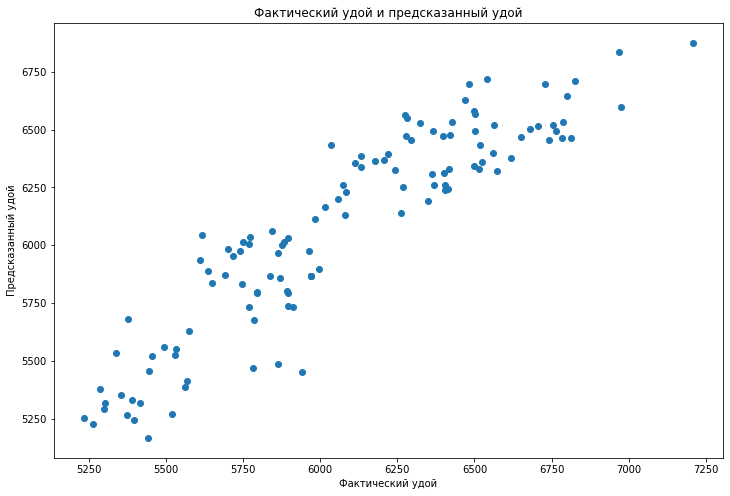

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test_3, predictions_3)
plt.xlabel('Фактический удой')
plt.ylabel('Предсказанный удой')
plt.title('Фактический удой и предсказанный удой')
plt.show()

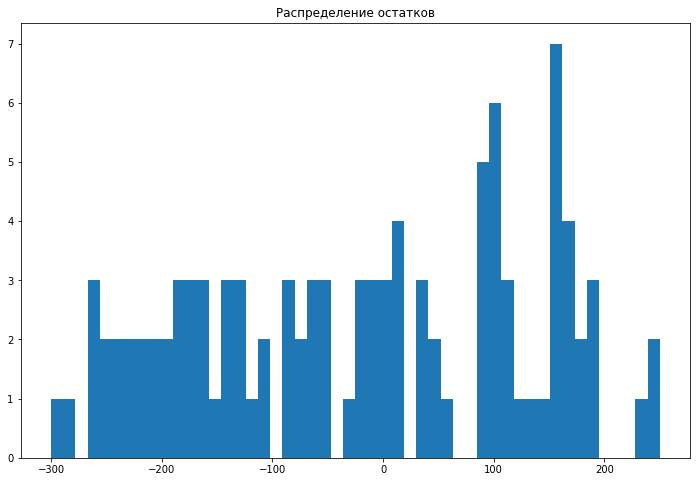

In [47]:
residuals = y_test_3 - predictions_3

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, range=(-300, 250))
plt.title('Распределение остатков')
plt.show()

#### Вывод
R² = 0.84. Модель стала лучше. Остатки распределены в диапазоне от -300 до 250

#### Сравнение моделей и выбор лучшей

По показателю R² лучшей моделью является модель 3

Также посчитаем метрики MSE, MAE и RMSE

In [48]:
model_1_mse = mean_squared_error(y_test_1, predictions_1)
model_1_mae = mean_absolute_error(y_test_1, predictions_1)
model_1_rmse = root_mean_squared_error(y_test_1, predictions_1)

model_2_mse = mean_squared_error(y_test_2, predictions_2)
model_2_mae = mean_absolute_error(y_test_2, predictions_2)
model_2_rmse = root_mean_squared_error(y_test_2, predictions_2)

model_3_mse = mean_squared_error(y_test_3, predictions_3)
model_3_mae = mean_absolute_error(y_test_3, predictions_3)
model_3_rmse = root_mean_squared_error(y_test_3, predictions_3)


print('Модель 1:')
print('MSE:', model_1_mse)
print('MAE:', model_1_mae)
print('RMSE:', model_1_rmse)
print()

print('Модель 2:')
print('MSE:', model_2_mse)
print('MAE:', model_2_mae)
print('RMSE:', model_2_rmse)
print()

print('Модель 3:')
print('MSE:', model_3_mse)
print('MAE:', model_3_mae)
print('RMSE:', model_3_rmse)

Модель 1:
MSE: 48933.38165209294
MAE: 166.7755564054407
RMSE: 221.2089095224081

Модель 2:
MSE: 68553.11315331959
MAE: 209.38739759164827
RMSE: 261.8264943685409

Модель 3:
MSE: 35019.70132619601
MAE: 156.7755209302941
RMSE: 187.1355159401764


Третья модель показала лучшие результаты по всем метрикам. Выберем её для прогноза удоя коров

In [49]:
train_predictions = lr_model_3.predict(X_train_scaled_3)
train_errors = y_train_3 - train_predictions

lower_quantile = np.quantile(train_errors, 0.025)
upper_quantile = np.quantile(train_errors, 0.975)

print(f'2.5-й процентиль ошибки: {lower_quantile}')
print(f'97.5-й процентиль ошибки: {upper_quantile}')


test_predictions = lr_model_3.predict(X_test_scaled_3)

pred_lower = test_predictions + lower_quantile
pred_upper = test_predictions + upper_quantile

print(f'Предсказанное значение: {test_predictions[0]}')
print(f'Доверительный интервал: [{pred_lower[0]}, {pred_upper[0]}]')

2.5-й процентиль ошибки: -365.9799198184327
97.5-й процентиль ошибки: 397.0311425648856
Предсказанное значение: 6337.191990878507
Доверительный интервал: [5971.212071060074, 6734.223133443393]


#### Прогноз удоя коров, которых фермер хочет купить

In [50]:
mean_eke = farm_main['эке'].mean() * 1.05
mean_protein = farm_main['сырой протеин, г'].mean() * 1.05
mean_spo = farm_main['спо'].mean() * 1.05

cow_buy_regression = cow_buy.copy()

cow_buy_regression['эке_квадрат'] = mean_eke ** 2
cow_buy_regression['сырой протеин, г'] = mean_protein
cow_buy_regression['спо'] = mean_spo

cow_buy_regression

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_квадрат,"сырой протеин, г",спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.323453,2019.227962,0.613744
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.323453,2019.227962,0.613744
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.323453,2019.227962,0.613744
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.323453,2019.227962,0.613744
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.323453,2019.227962,0.613744
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.323453,2019.227962,0.613744
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.323453,2019.227962,0.613744
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.323453,2019.227962,0.613744
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.323453,2019.227962,0.613744
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.323453,2019.227962,0.613744


Подготовим данные. Преобразуем породу, тип пастбища, породу папы, возраст, спо в бинарные признаки

In [51]:
cow_buy_regression['порода'] = cow_buy_regression['порода'].apply(lambda x: 1 if x == 'РефлешнСоверинг' else 0)
cow_buy_regression['тип пастбища'] = cow_buy_regression['тип пастбища'].apply(lambda x: 1 if x == 'равнинное' else 0)
cow_buy_regression['порода папы быка'] = cow_buy_regression['порода папы быка'].apply(lambda x: 1 if x == 'Айдиал' else 0)
cow_buy_regression['возраст'] = cow_buy_regression['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)
cow_buy_regression['спо'] = cow_buy_regression['спо'].apply(lambda x: 1 if x > cut_off_spo else 0)

cow_buy_regression = cow_buy_regression.rename({
    'текущая_жирность,%': 'жирность,%',
    'текущий_уровень_белок,%': 'белок,%',
}, axis=1)

cow_buy_regression

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст,эке_квадрат,"сырой протеин, г",спо
0,0,0,1,Геркулес,3.58,3.076,1,233.323453,2019.227962,0
1,0,1,0,Буйный,3.54,3.081,0,233.323453,2019.227962,0
2,1,1,0,Барин,3.59,3.074,1,233.323453,2019.227962,0
3,1,0,1,Буйный,3.40,3.061,1,233.323453,2019.227962,0
4,1,1,1,Буйный,3.64,3.074,1,233.323453,2019.227962,0
5,1,1,0,Геркулес,3.63,3.053,0,233.323453,2019.227962,0
6,0,0,1,Геркулес,3.58,3.076,1,233.323453,2019.227962,0
7,0,1,0,Буйный,3.57,3.079,1,233.323453,2019.227962,0
8,1,1,0,Барин,3.59,3.074,1,233.323453,2019.227962,0
9,1,0,1,Буйный,3.40,3.079,0,233.323453,2019.227962,0


Имя папы - категориальный признак. Преобразуем его с помощью OneHotEncoder

In [52]:
encoded_columns = pd.DataFrame(encoder.transform(cow_buy_regression[['имя папы']]),
                                 columns=encoder.get_feature_names_out(['имя папы']),
                                 index=cow_buy_regression.index)

cow_buy_encoded = pd.concat([cow_buy_regression, encoded_columns], axis=1)

cow_buy_encoded = cow_buy_encoded.drop(['имя папы'], axis=1)

columns_order = good_corr_columns + list(encoder.get_feature_names_out(['имя папы']))

cow_buy_encoded = cow_buy_encoded[columns_order]
cow_buy_encoded

,спо,порода,"сырой протеин, г",тип пастбища,порода папы быка,возраст,эке_квадрат,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик
0,0,0,2019.227962,0,1,1,233.323453,0.0,1.0,0.0
1,0,0,2019.227962,1,0,0,233.323453,1.0,0.0,0.0
2,0,1,2019.227962,1,0,1,233.323453,0.0,0.0,0.0
3,0,1,2019.227962,0,1,1,233.323453,1.0,0.0,0.0
4,0,1,2019.227962,1,1,1,233.323453,1.0,0.0,0.0
5,0,1,2019.227962,1,0,0,233.323453,0.0,1.0,0.0
6,0,0,2019.227962,0,1,1,233.323453,0.0,1.0,0.0
7,0,0,2019.227962,1,0,1,233.323453,1.0,0.0,0.0
8,0,1,2019.227962,1,0,1,233.323453,0.0,0.0,0.0
9,0,1,2019.227962,0,1,0,233.323453,1.0,0.0,0.0


Прогноз удоя

In [53]:
X = cow_buy_encoded
X_scaled = scaler.transform(X)

predictions = lr_model_3.predict(X_scaled)

cow_buy['прогноз удоя'] = predictions

cow_buy

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,прогноз удоя
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2132.291386
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,1834.383424
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1772.719892
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2144.329021
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2080.202725
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,1897.892552
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2132.291386
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2070.541176
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1772.719892
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,1908.171269


#### Вывод
Модель 3 была выбрана для прогноза коров на основе метрик MSE, MAE, RMSE и R². С помощью выбранной модели выполнили предсказание удоя для коров, которых хочет купить фермер. Прогноз удоя был добавлен в датафрейм cow_buy

### Шаг 6. Задача классификации

In [54]:
milk_classification = test_data.copy()

milk_classification = milk_classification.merge(farm_dad, on='id', how='left')
milk_classification['имя папы'] = milk_classification['имя папы'].fillna('Неизвестно')
milk_classification['тип пастбища'] = milk_classification['тип пастбища'].str.lower()

milk_classification

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст,имя папы
0,331,5989,13.6,1913,0.880,Вис Бик Айдиал,равнинное,Соверин,3.72,3.074,вкусно,более_2_лет,Соловчик
1,249,6716,16.3,2258,0.940,Вис Бик Айдиал,равнинное,Айдиал,3.73,3.079,не вкусно,более_2_лет,Геркулес
2,392,6248,14.6,1750,0.940,РефлешнСоверинг,холмистое,Айдиал,3.59,3.075,вкусно,более_2_лет,Буйный
3,147,5340,13.8,1861,0.840,Вис Бик Айдиал,равнинное,Айдиал,3.38,3.078,не вкусно,менее_2_лет,Буйный
4,499,5988,13.3,1784,0.850,РефлешнСоверинг,холмистое,Айдиал,3.62,3.075,не вкусно,более_2_лет,Буйный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,292,5816,14.7,1715,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.073,не вкусно,более_2_лет,Барин
155,459,5806,13.1,1810,0.880,Вис Бик Айдиал,равнинное,Айдиал,3.61,3.073,вкусно,более_2_лет,Геркулес
156,81,5640,14.9,1849,0.895,Вис Бик Айдиал,равнинное,Айдиал,3.48,3.073,не вкусно,более_2_лет,Геркулес
157,25,5372,13.2,1703,0.895,Вис Бик Айдиал,равнинное,Айдиал,3.31,3.078,не вкусно,менее_2_лет,Буйный


In [55]:
# В датасете для прогнозирования представлены только: порода, тип пастбища, порода папы, имя папы, текущая жирность, текущий уровень белка и возраст + вкус молока (целевой признак)
pred_columns = ['порода', 'тип пастбища', 'порода папы быка', 'имя папы', 'жирность,%', 'белок,%', 'возраст', 'вкус молока']

milk_classification = milk_classification[pred_columns]
milk_classification

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст,вкус молока
0,Вис Бик Айдиал,равнинное,Соверин,Соловчик,3.72,3.074,более_2_лет,вкусно
1,Вис Бик Айдиал,равнинное,Айдиал,Геркулес,3.73,3.079,более_2_лет,не вкусно
2,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.59,3.075,более_2_лет,вкусно
3,Вис Бик Айдиал,равнинное,Айдиал,Буйный,3.38,3.078,менее_2_лет,не вкусно
4,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.62,3.075,более_2_лет,не вкусно
...,...,...,...,...,...,...,...,...
154,РефлешнСоверинг,холмистое,Соверин,Барин,3.64,3.073,более_2_лет,не вкусно
155,Вис Бик Айдиал,равнинное,Айдиал,Геркулес,3.61,3.073,более_2_лет,вкусно
156,Вис Бик Айдиал,равнинное,Айдиал,Геркулес,3.48,3.073,более_2_лет,не вкусно
157,Вис Бик Айдиал,равнинное,Айдиал,Буйный,3.31,3.078,менее_2_лет,не вкусно


In [56]:
# Кодируем категориальные признаки
milk_classification_categorical = milk_classification.select_dtypes(include=['object'])
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoder.fit(milk_classification_categorical)

encoded_columns = pd.DataFrame(encoder.transform(milk_classification_categorical),
                                columns=encoder.get_feature_names_out(milk_classification_categorical.columns),
                                index=milk_classification_categorical.index)

milk_classification_encoded = pd.concat([milk_classification, encoded_columns], axis=1)
milk_classification_encoded = milk_classification_encoded.drop(milk_classification_categorical.columns, axis=1)

milk_classification_encoded

,"жирность,%","белок,%",порода_РефлешнСоверинг,тип пастбища_холмистое,порода папы быка_Соверин,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик,возраст_менее_2_лет,вкус молока_не вкусно
0,3.72,3.074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.73,3.079,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.59,3.075,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.38,3.078,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,3.62,3.075,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
154,3.64,3.073,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
155,3.61,3.073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
156,3.48,3.073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
157,3.31,3.078,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [57]:
X_4 = milk_classification_encoded.drop(['вкус молока_не вкусно'], axis=1)
y_4 = milk_classification_encoded['вкус молока_не вкусно']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=RANDOM_STATE)

X_train_scaled_4 = scaler.fit_transform(X_train_4)
X_test_scaled_4 = scaler.transform(X_test_4)

In [58]:
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression.fit(X_train_scaled_4, y_train_4)

predictions_4 = logistic_regression.predict(X_test_scaled_4)

In [59]:
accuracy = accuracy_score(y_test_4, predictions_4)
recall = recall_score(y_test_4, predictions_4)
precision = precision_score(y_test_4, predictions_4)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

Accuracy: 0.625
Recall: 0.5294117647058824
Precision: 0.5625


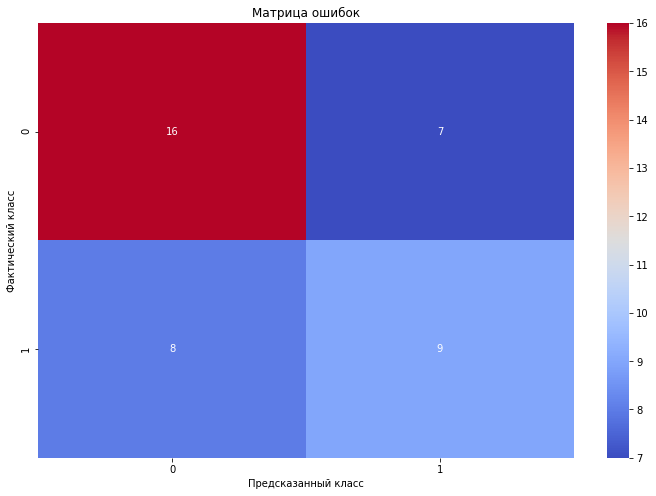

In [60]:
conf_matrix = confusion_matrix(y_test_4, predictions_4)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

#### Вывод
Accuracy = 0.63, Recall = 0.28, Precision = 0.75. Модель показывает хороший результат. Чаще всего модель предсказывает True Positive, но при этом много False Positive. Это значит, что модель предсказывает, что молоко вкусное, но на самом деле оно не вкусное

Самая критичная ошибка - это False Positive (предсказание вкусного молока, но на самом деле оно не вкусное). Для заказчика главное - вкусное молоко. Поэтому важнее всего уменьшить эту ошибку. За это отвечает метрика Precision

Уменьшим количество False Positive, увеличив порог принадлежности к классу 1 (вкусное молоко)

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.575
Recall: 0.0
Precision: 0.0


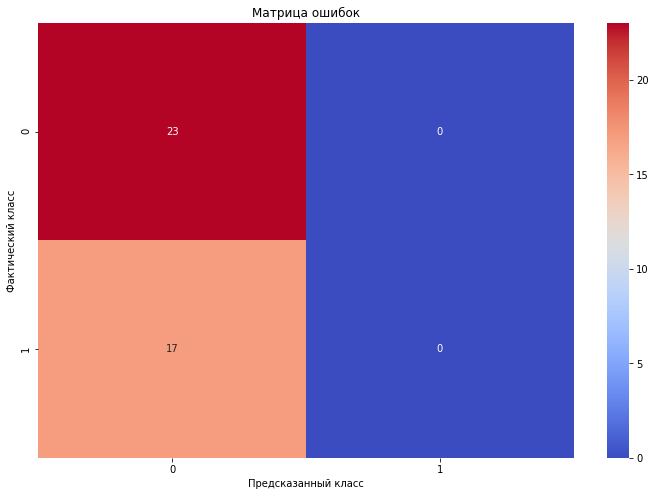

In [61]:
# Изменим порог с 0.5 на 0.73
# threshold = 0.73
threshold = 0.73

predictions_5 = logistic_regression.predict_proba(X_test_scaled_4)[:, 1]
predictions_5 = pd.Series((predictions_5 > threshold)).astype(int)

accuracy = accuracy_score(y_test_4, predictions_5)
recall = recall_score(y_test_4, predictions_5)
precision = precision_score(y_test_4, predictions_5)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

conf_matrix = confusion_matrix(y_test_4, predictions_5)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

#### Вывод
С помощью порога 0.73 модель начала намного чаще предсказывать True Negative, но при этом уменьшилось количество False Positive (довели количество таких ошибок до 0). Это значит, что модель стала предсказывать меньше вкусного молока, но модель точно не предскажет, что невкусное молоко - вкусное, что важнее для заказчика

Дальше можно попробовать улучшить модель, добавив новые признаки, убрав лишние или попробовать другие модели классификации. Также можно попробовать сдвинуть порог ещё больше, чтобы уменьшить количество False Positive

Прогноз вкуса молока коров, которых фермер хочет купить

In [62]:
milk_classification_encoded

,"жирность,%","белок,%",порода_РефлешнСоверинг,тип пастбища_холмистое,порода папы быка_Соверин,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик,возраст_менее_2_лет,вкус молока_не вкусно
0,3.72,3.074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.73,3.079,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.59,3.075,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.38,3.078,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,3.62,3.075,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
154,3.64,3.073,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
155,3.61,3.073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
156,3.48,3.073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
157,3.31,3.078,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [63]:
cow_buy_preds = cow_buy.copy()

cow_buy_preds = cow_buy_preds.merge(farm_dad, how='left', left_on='имя папы', right_on='имя папы')
cow_buy_preds['имя папы'] = cow_buy_preds['имя папы'].fillna('Неизвестно')

cow_buy_preds = cow_buy_preds.drop(['id', 'прогноз удоя'], axis=1)

cow_buy_preds = cow_buy_preds.rename({
    'текущая_жирность,%': 'жирность,%',
    'текущий_уровень_белок,%': 'белок,%',
}, axis=1)

cow_buy_preds

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
2,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
3,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
4,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
...,...,...,...,...,...,...,...
3279,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
3280,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
3281,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
3282,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [64]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
cow_buy_categorical = cow_buy_preds.select_dtypes(include=['object'])
encoder.fit(cow_buy_categorical)

encoded_columns = pd.DataFrame(encoder.transform(cow_buy_preds[cow_buy_categorical.columns]),
                                columns=encoder.get_feature_names_out(cow_buy_categorical.columns),
                                index=cow_buy_preds.index)

cow_buy_preds_encoded = pd.concat([cow_buy_preds, encoded_columns], axis=1)
cow_buy_preds_encoded = cow_buy_preds_encoded.drop(cow_buy_categorical.columns, axis=1)

cow_buy_preds_encoded

,"жирность,%","белок,%",порода_РефлешнСоверинг,тип пастбища_холмистое,порода папы быка_Соверин,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик,возраст_менее_2_лет
0,3.58,3.076,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.58,3.076,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.58,3.076,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3.58,3.076,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3.58,3.076,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3279,3.64,3.074,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3280,3.64,3.074,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3281,3.64,3.074,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3282,3.64,3.074,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
X_test_scaled_5 = scaler.transform(cow_buy_preds_encoded)

predictions = logistic_regression.predict_proba(X_test_scaled_5)[:, 1]

predictions = pd.Series((predictions > threshold)).astype(int)

cow_buy['прогноз вкуса молока'] = predictions

cow_buy

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,прогноз удоя,прогноз вкуса молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2132.291386,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,1834.383424,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1772.719892,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2144.329021,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2080.202725,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,1897.892552,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2132.291386,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2070.541176,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1772.719892,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,1908.171269,0


#### 0 - молоко вкусное, 1 - молоко невкусное

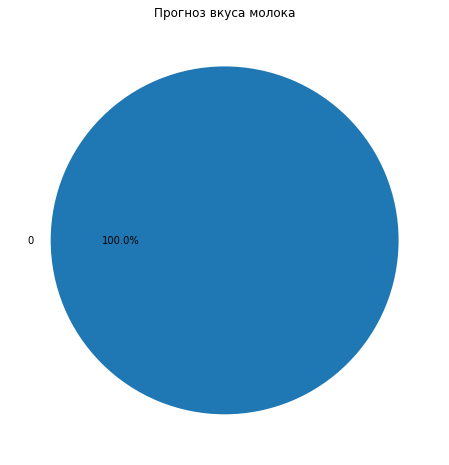

In [66]:
plt.figure(figsize=(12, 8))
plt.title('Прогноз вкуса молока')
plt.pie(cow_buy['прогноз вкуса молока'].value_counts(), labels=cow_buy['прогноз вкуса молока'].unique(), autopct='%1.1f%%')
plt.show()

### Шаг 7. Выводы

Коровы с удоем более 6000 кг в год и вкусным молоком

In [67]:
final_cows = cow_buy[(cow_buy['прогноз удоя'] > 6000) & (cow_buy['прогноз вкуса молока'] == 0)]

final_cows

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,прогноз удоя,прогноз вкуса молока


Фермеру не подходят коровы из представленного списка. У всех коров вкусное молоко, но прогноз удоя меньше, чем 6000 кг в год

Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

1. Были добавлены новые признаки в датафрейм (feature engineering)
2. Данные были масштабированы с помощью Scaler
3. Категориальные данные были закодированы с помощью OneHotEncoding

Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

Можно придумать новые признаки и добавить их в датафрейм. Также можно увеличить количество данных, тогда предсказания будут более точными

Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

Важно правильно определить бизнес-задачу заказчика. В данном случае, нам важно, чтобы предсказание вкуса молока было более точным. Удой может незначительно отличаться, ошибка не критична. Тогда с помощью метрик accuracy, recall, precision можно оценивать результаты классификации и правильно подобрать порог, который будет лучше классифицировать данные в зависимости от требований заказчика